# Tunning Your Model

As a Data Scientist you need to be able to tune your model to make sure it is predicting as accurately as possible and doing it as fast as possible. There are a couple of parameters that you will have the opportunity to tweak for the Gradient Descent Optimizer.

    Learning Rate - Determines how fast your model will learn. The higher the number the faster it will learn.

In [1]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import sys
import math
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
print('Python version ' + sys.version)
print('Tensorflow version ' + tf.VERSION)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
Tensorflow version 1.12.0
Pandas version 0.20.3
Numpy version 1.15.4


##  Create Test Data

y = m * x + b  

    We are going to call our x variable, train_x
    We are going to call our y variable, train_y

In [3]:
# let's generate 100 random samples
train_x = np.random.rand(100).astype(np.float32)

In [4]:
# let's compute y_data using 0.1 for m and 0.3 for b
train_y = 0.1 * train_x + 0.3

### Pick a Large Learning Rate

In [10]:
# placeholders
x = tf.placeholder(tf.float32, name="01_x")
y = tf.placeholder(tf.float32, name="01_y")

# variables
W = tf.Variable(np.random.rand())
b = tf.Variable(np.random.rand())
pred = W * train_x + b

# minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(pred - train_y))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

### How Good is Your model?

In [11]:
# check accuracy of model
correct_prediction = tf.equal(tf.round(pred), tf.round(train_y))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Keep the Number of Iterations at 200

In [14]:
# hold step and error values
t = []

# initialize the variables
init = tf.global_variables_initializer()

# run your graph
with tf.Session() as sess:
    sess.run(init)

    # fit the function.
    for step in range(6000):
        # get your data
        train_data = {x:train_x, y:train_y}
        
        # training in progress...
        sess.run(train, feed_dict=train_data)
        
        # capture the step and error for analysis
        t.append((step, sess.run(loss, feed_dict=train_data)))        
            
    # here is where you see how good of a Data Scientist you are        
    print("Accuracy on the Training Set:", accuracy.eval({x: train_x, y: train_y}) )

Accuracy on the Training Set: 1.0


As you can see, since we increased the learning rate, our model tries to learn too quickly and it actually jumps over the local minimum we are after.

## Plot Loss Function vs Iterations

    Plotting your data is going to give you a clear picture if you need your change your LR and/or the number of iterations

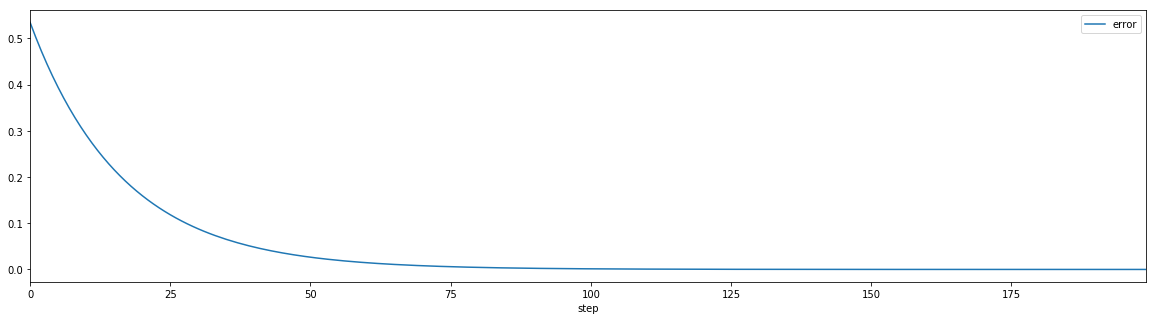

In [9]:
pd.DataFrame(t, columns=['step', 'error']).set_index('step').plot(figsize=(20,5));

## Change the LR to .001

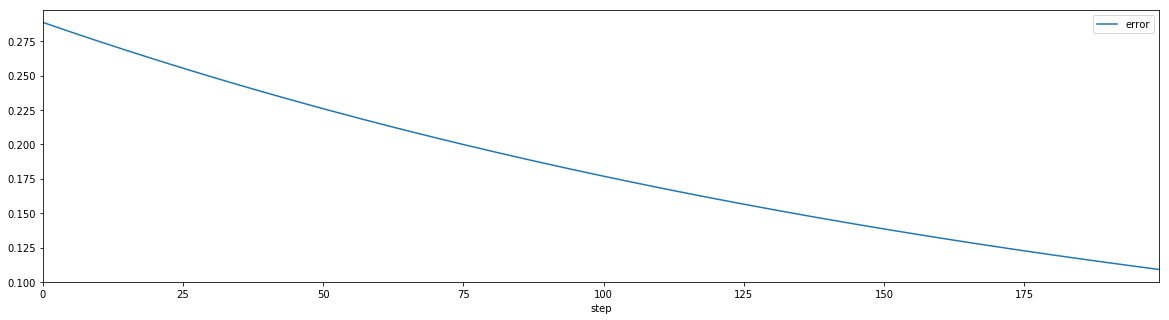

In [13]:
pd.DataFrame(t, columns=['step', 'error']).set_index('step').plot(figsize=(20,5));

## Change the Number of Iterations to 6,000

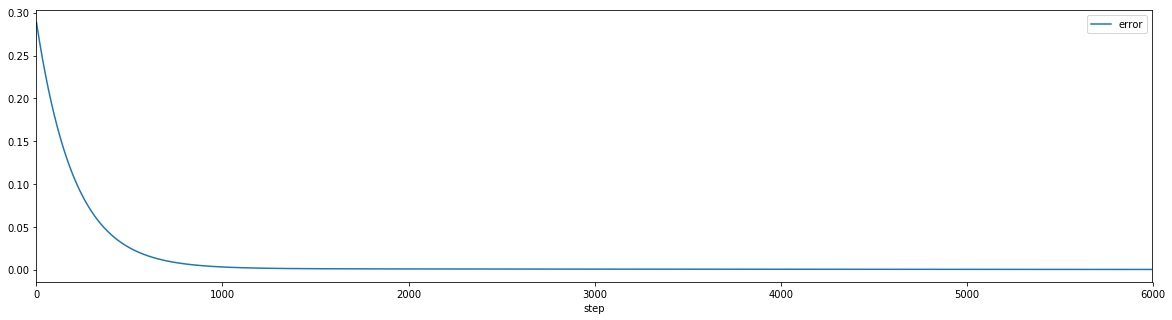

In [15]:
pd.DataFrame(t, columns=['step', 'error']).set_index('step').plot(figsize=(20,5));